In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from keras.models import Model
from keras.layers import Input, Dense

In [3]:
def load_audio_files(file_paths):
    features = []
    for file_path in file_paths:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs = np.mean(mfccs.T, axis=0)  # Среднее значение по временной оси
        features.append(mfccs)
    return np.array(features)

# Пример путей к звуковым файлам
file_paths = ['1.wav', '2.wav', '3.wav', '4.wav', '5.wav', '6.wav',
              '8.wav', '10​.wav', '11​.wav', '12​.wav', '13​.wav', '14​.wav'
             , '15.wav', '17.wav', '18.wav', '19.wav', '20.wav', '21.wav', '22.wav'
             , '23.wav', '24.wav', '7​.wav', '9​.wav' ]  # Замените на ваши пути 
X = load_audio_files(file_paths)


In [13]:
X.shape[1]

13

In [4]:
# Создание модели Deep Clustering
# Определяем размерность входных данных
input_dim = X.shape[1]

# Входной слой
input_layer = Input(shape=(input_dim,))
# Кодирующий слой
encoded = Dense(64, activation='relu')(input_layer)
# Декодирующий слой
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Создаем модель автоэнкодера
autoencoder = Model(input_layer, decoded)

# Компилируем модель
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель
autoencoder.fit(X, X, epochs=100, batch_size=2, shuffle=True, verbose=0)


In [5]:
# Извлечение признаков и кластеризация
# Извлекаем закодированные признаки
encoder = Model(input_layer, encoded)
encoded_features = encoder.predict(X)

# Применяем KMeans для кластеризации
num_clusters = 4  # Задайте количество кластеров бизда 4 турдаги қуш овозини фарқлаши керак
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(encoded_features)

# Получаем метки кластеров
labels = kmeans.labels_
print("Labels:", labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Labels: [3 3 1 2 2 2 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 3 0]


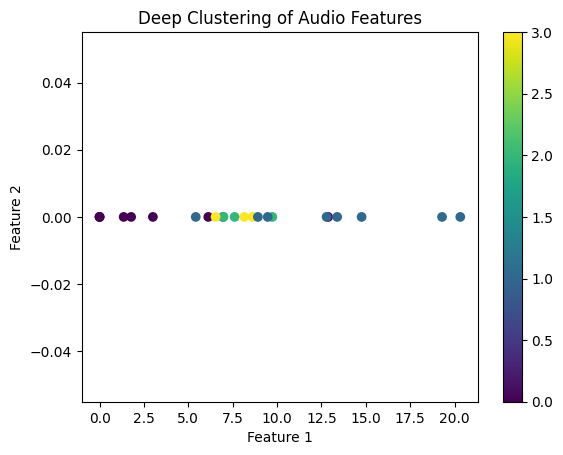

In [6]:
# Визуализация результатов
plt.scatter(encoded_features[:, 0], encoded_features[:, 1], c=labels, cmap='viridis')
plt.title('Deep Clustering of Audio Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


In [7]:
# endi ajratilgan audolar uchun alohida papka qilib ularni joylaymiz
import os
import shutil

In [11]:
# Путь к директории, где находятся ваши аудиофайлы
audio_directory = 'C:\\Users\\User\\Desktop\\AI\\neuron_network\\types_N-N\\deep-clustering'  # Замените на ваш путь

# Папка, в которую будут созданы кластеры
output_directory = 'C:\\Users\\User\\Desktop\\AI\\neuron_network\\types_N-N\\deep-clustering'  # Замените на ваш путь

# Создаем папки для кластеров
for cluster in range(4):  # Предполагаем, что у нас 4 кластера (0, 1, 2, 3)
    cluster_folder = os.path.join(output_directory, str(cluster))
    os.makedirs(cluster_folder, exist_ok=True)

# Перемещаем аудиофайлы в соответствующие папки
for i, label in enumerate(labels):
    audio_file = file_paths[i]  # Получаем путь к аудиофайлу
    # Создаем путь для перемещения
    destination = os.path.join(output_directory, str(label), os.path.basename(audio_file))
    shutil.move(audio_file, destination)  # Перемещаем файл
